# **Week 7 notebook**

### **Exercise 3.1**

<img src="SymPyBilleder/2025-10-19-12-20-55.png" width="550">

##### **1.**

So we have the line:
$$
y = ax^2+bx+\epsilon
$$
We can write it as matrix form where:
$$
X = \begin{bmatrix} 0^2 & 0 \\ 1^2 & 1 \\ 1^2 & 1 \\ 2^2 & 2 \end{bmatrix}
$$
$$
y = \begin{bmatrix} 0.5 \\ 0 \\ -0.5 \\ -2 \end{bmatrix}
$$
Hence, we have a model:
$$
\begin{bmatrix} 0.5 \\ 0 \\ -0.5 \\ -2 \end{bmatrix} = \begin{bmatrix} 0^2 & 0 \\ 1^2 & 1 \\ 1^2 & 1 \\ 2^2 & 2 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} + \epsilon
$$
To estimate the parameters a and b, we use the least squares estimator:
$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$
See Python.

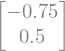

In [ ]:
from sympy import*
init_printing()

X = Matrix([[0,0],[1,1],[1,1],[4,2]])
Y = Matrix([0.5, 0, -0.5, -2])

beta = (X.T*X).inv()*X.T*Y
beta

Hence, $a = -0.75$ and $b=0.25$. Then to estimate error we have:
$$
\hat{\epsilon} = y - X\hat{\beta}
$$
See Python.

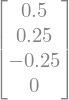

In [ ]:
Y-X*beta

These are our errors.

### **Exercise 3.2**

<img src="SymPyBilleder/2025-10-19-12-21-23.png" width="550">

##### **1.**

Fisrt, if we just insert all numbers, the models will be given as:
$$
\begin{bmatrix} 2127 \\ 442 \\ 516 \\ 1458 \\ 130 \end{bmatrix} = a + b \begin{bmatrix} 286 \\ 58 \\ 75 \\ 167 \\ 22 \end{bmatrix} \begin{bmatrix} \sqrt{155} \\ \sqrt{85} \\ \sqrt{97.5} \\ \sqrt{196.4} \\ \sqrt{24.6} \end{bmatrix} + c \begin{bmatrix} 286 \\ 58 \\ 75 \\ 167 \\ 22 \end{bmatrix}
$$
Now we somehow estimate the parameters in R.

In [ ]:
TO <- c(2127, 442, 516, 1458, 130)
P  <- c(286, 58, 75, 167, 22)
A  <- c(155, 85, 97.5, 196.4, 24.6)

# Code for model matrix:
data <- data.frame(TO = TO, P = P, A = A)

# Now we just fit the model:
model1 <- lm(TO ~ I(P * sqrt(A)) + P)
summary(model1)


Call:
lm(formula = TO ~ I(P * sqrt(A)) + P)

Residuals:
      1       2       3       4       5 
 -6.948  38.781  -3.981   4.477 -32.329 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)    108.8487    34.2524   3.178   0.0864 .
I(P * sqrt(A))   0.6208     0.1158   5.361   0.0331 *
P               -0.6482     1.5769  -0.411   0.7209  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.29 on 2 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9981 
F-statistic:  1048 on 2 and 2 DF,  p-value: 0.0009537


From the output, we can see that $a=108.85$, $b=0.621$ and $c=-0.648$. Now for model 2.

In [ ]:
model2 <- lm(TO ~ I(P * sqrt(A)) + sqrt(A))
summary(model2)


Call:
lm(formula = TO ~ I(P * sqrt(A)) + sqrt(A))

Residuals:
      1       2       3       4       5 
  3.575  27.210 -19.394  -5.232  -6.159 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25.79551   46.86576   0.550  0.63730    
I(P * sqrt(A))  0.55392    0.01445  38.326  0.00068 ***
sqrt(A)        10.06519    6.03542   1.668  0.23731    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.44 on 2 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9991 
F-statistic:  2310 on 2 and 2 DF,  p-value: 0.0004327


Here, we see that $d = 25.79$ and $f = 0.55$ and $g = 10.07$.

##### **2.**

In [ ]:
summary(model1)


Call:
lm(formula = TO ~ I(P * sqrt(A)) + P)

Residuals:
      1       2       3       4       5 
 -6.948  38.781  -3.981   4.477 -32.329 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)    108.8487    34.2524   3.178   0.0864 .
I(P * sqrt(A))   0.6208     0.1158   5.361   0.0331 *
P               -0.6482     1.5769  -0.411   0.7209  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.29 on 2 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9981 
F-statistic:  1048 on 2 and 2 DF,  p-value: 0.0009537


Or we can use the formula:
$$
\hat{\sigma} = \sqrt{\frac{\sum e^2_1}{n-k}}
$$
Here, $n = 5$ number of observations, $k= 3$ number of parameters and we read the residuals from the summary output.

In [ ]:
(-6.948)^2 + (38.781)^2 + (-3.981)^2 + (4.477)^2 + (-32.329)^2

[1] 2633.297

We insert everything:
$$
\hat{\sigma} = \sqrt{\frac{2633.296796}{5-3}} = 36.29
$$
This matches the R output.

##### **3.**

First, we test for $c=0$ below for model 1.

In [ ]:
model_full <- lm(TO ~ I(P * sqrt(A)) + P)
model_no_c <- lm(TO ~ I(P * sqrt(A)))
anova(model_no_c, model_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,2855.727,NA,NA,NA,NA
2,2,2633.283,1,222.4442,0.1689482,0.7209049


Here, we see that $p=0.72$ which is larger than 0.05, hence we do not reject the null hypothesis that $c=0$, so we can assume that $c=0$.

In [ ]:
model_full <- lm(TO ~ I(P * sqrt(A)) + P)
model_no_a <- lm(TO ~ 0 + I(P * sqrt(A)) + P)
anova(model_no_a, model_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,15929.649,NA,NA,NA,NA
2,2,2633.283,1,13296.37,10.0987,0.08638468


Here, $p=0.086$ which is larger than 0.05, hence we do not reject the null hypothesis that $a=0$, so we can assume that $a=0$.

##### **4.**

Now for model 2.

In [ ]:
summary(model2)


Call:
lm(formula = TO ~ I(P * sqrt(A)) + sqrt(A))

Residuals:
      1       2       3       4       5 
  3.575  27.210 -19.394  -5.232  -6.159 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25.79551   46.86576   0.550  0.63730    
I(P * sqrt(A))  0.55392    0.01445  38.326  0.00068 ***
sqrt(A)        10.06519    6.03542   1.668  0.23731    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.44 on 2 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9991 
F-statistic:  2310 on 2 and 2 DF,  p-value: 0.0004327


Here, the residual is 24.44, which is lower than for model 1 which was around 36. Now we check if we can assume that $d=0$ and $g=0$.

In [ ]:
model_full <- lm(TO ~ I(P * sqrt(A)) + sqrt(A))
model_no_g <- lm(TO ~ I(P * sqrt(A)))
anova(model_no_g, model_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,2855.727,NA,NA,NA,NA
2,2,1194.569,1,1661.159,2.781186,0.2373115


In [ ]:
model_full <- lm(TO ~ I(P * sqrt(A)) + sqrt(A))
model_no_d <- lm(TO ~ 0 + I(P * sqrt(A)) + sqrt(A))
anova(model_no_d, model_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,1375.518,NA,NA,NA,NA
2,2,1194.569,1,180.9498,0.3029541,0.6373015


Both $p$-values are all higher than $0.05$, hence we do not reject the null hypotheses that $d=0$ and $g=0$. So we can assume that both are 0.

##### **5.**

From here we can see that for both models we can get rid of their $a$ and $c$ and $d$ and $g$ parameters, so the simplified models for both 1 and 2 becomes the same:
$$
TO = b \cdot P \cdot \sqrt{A}
$$
Therefore, since they are essentially the same model, then we can say that model 2 is better than model 1, since it has the lower residual error.

### **Exercise 6.4**

<img src="SymPyBilleder/2025-10-19-12-22-05.png" width="550">

##### **1.**

So we already know the three mean values, and the average of those is:
$$
\bar{\mu} = \begin{bmatrix} \frac{-1+4+3}{3} \\ \frac{4+5+6}{3} \end{bmatrix} = \begin{bmatrix} 2 \\ 5 \end{bmatrix}
$$
Now we just verify $B$ by inserting the values and calculating:
$$
B_1 = \begin{bmatrix} -3 \\ -1\end{bmatrix} \begin{bmatrix} -3 & -1 \end{bmatrix} = \begin{bmatrix} 9 & 3 \\ 3 & 1 \end{bmatrix}
$$
$$
B_2 = \begin{bmatrix} 2 \\ 0\end{bmatrix} \begin{bmatrix} 2 & 0 \end{bmatrix} = \begin{bmatrix} 4 & 0 \\ 0 & 0 \end{bmatrix}
$$
$$
B_3 = \begin{bmatrix} 1 \\ 1\end{bmatrix} \begin{bmatrix} 1 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}
$$
$$
B = B_1 + B_2 + B_3 = \begin{bmatrix} 14 & 4 \\ 4 & 2 \end{bmatrix}
$$
The calculation is correct.

##### **2.**

Here, we know that $v_i=d'\mu_i$ and where $d' = \begin{bmatrix} a \\ b \end{bmatrix}$ and we need to show that:
$$
\sum_{i=1}^3 (v_i -\bar{v})^2 = d'Bd
$$
So first we know that we can have:
$$
\sum_{i=1}^3 (d'\mu_i - d'\bar{\mu})^2 = \sum_{i=1}^3 (d'(\mu_i - \bar{\mu}))^2
$$
Furthermore, squaring a matrix we have to multiply with its transpose, so we get:
$$
\sum_{i=1}^3 (d'(\mu_i - \bar{\mu}))((\mu_i - \bar{\mu})'d) = \sum_{i=1}^3 d'(\mu_i - \bar{\mu})(\mu_i - \bar{\mu})'d
$$
We know that $(\mu_i - \bar{\mu})(\mu_i - \bar{\mu}) = B$ hence:
$$
= d'Bd
$$
So now we have shown the proof.

##### **3.**

First we try and insert everything because we know $B$ and $\Sigma$ so we get:
$$
\frac{d_k' B d_k}{d_k' \Sigma d_k} = \frac{d_k'\begin{bmatrix} 14 & 4 \\ 4 & 2 \end{bmatrix}d_k}{d_k' \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}d_k}
$$
Further inserting our $d_k$ we get:
$$
\frac{\begin{bmatrix} a & b \end{bmatrix} \begin{bmatrix} 14 & 4 \\ 4 & 2 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix}}{\begin{bmatrix} a & b \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix}}
$$
This is like solving a generalized eigenvalue problem of the form:
$$
Bd = \lambda \Sigma d
$$
We find eigenvectors of $B$.

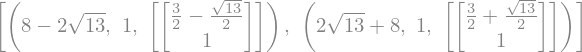

In [ ]:
from sympy import*
init_printing()

B = Matrix([[14,4],[4,2]])
B.eigenvects()

So now we have $\lambda_2 = 8 - 2 \sqrt{13}$ and $\lambda_1 = 2\sqrt{13}+8$, now to determine $d_1$ maximize ratio when $k=1$, and $d_1$ is the eigenvector corresponding to $\lambda_1$, and as we can see, the eigenvector is given as:
$$
v_1 = \begin{bmatrix} \frac{3}{2} + \frac{\sqrt{13}{1}}{1} \\ 1 \end{bmatrix}
$$
Now when $k=2$ we have the second eigenvalue $\lambda_2$ and its corresponding eigenvector:
$$
v_2 = \begin{bmatrix} \frac{3}{2} - \frac{\sqrt{13}{1}}{1} \\ 1 \end{bmatrix}
$$
We test this that $d_1'\Sigma d_2 = 0$ in Python.

In [ ]:
d_1 = (B.eigenvects())[1][2][0]
d_2 = (B.eigenvects())[0][2][0]

((d_1.T*B*d_2)[0]).evalf()

This number is so low that it is basically 0.

##### **4.**

We do the same but now we just change $\Sigma$ to:
$$
\begin{bmatrix} 9 & 0 \\ 0 & 1 \end{bmatrix}
$$
We do everything in Sympy again.

In [ ]:
Sigma_new = Matrix([[9, 0], [0, 1]])
l = Symbol('lambda')
d = Matrix([Symbol('a'), Symbol('b')])

B_Sigma = B - l*Sigma_new   

# We have to poly solve because now we have lambda vals:
char_poly = B_Sigma.det()
char_poly = expand(char_poly)
char_poly

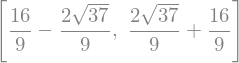

In [ ]:
# Now eigenvalues:
eigenvals = solve(char_poly, l)
eigenvals

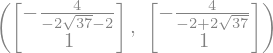

In [ ]:
# Eigenvectors:
# (sort so that eigenval1 > eigenval2)
eigenval1 = eigenvals[1]
eigenval2 = eigenvals[0]

M1 = B_Sigma.subs(l, eigenval1)
M2 = B_Sigma.subs(l, eigenval2)

d_1 = M1.nullspace()[0]
d_2 = M2.nullspace()[0]

d_1, d_2

In [ ]:
((d_1.T*Sigma_new*d_2)[0]).evalf()

Small enough to be $0$ again so correct I think?

# **Slide G in R code**

Warning message:
“package ‘car’ was built under R version 4.3.3”
Loading required package: carData



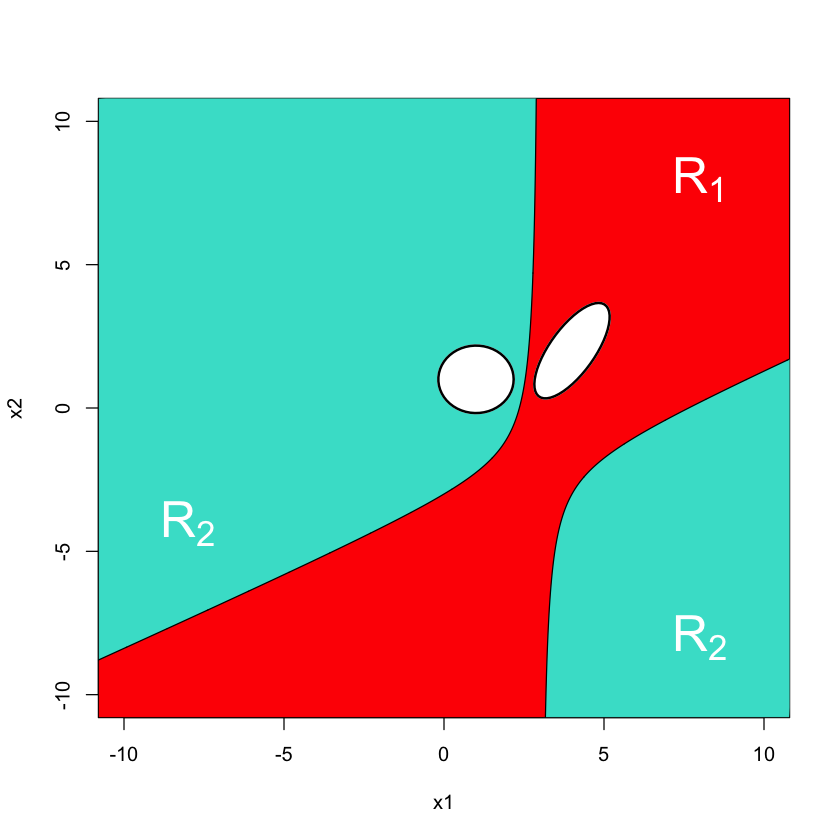

In [ ]:
# Slide 8:

library(car)
plot((-10):10,(-10):10,pch='',xlab='x1',ylab='x2')
rect(par("usr")[1],par("usr")[3],par("usr")[2],par("usr")[4],col = "red")

f<-function(x1){(x1^2-10*x1+18)/(2*x1-6)}

index<-(-1500):290/100
polygon(c(index,par("usr")[1],par("usr")[1]),
        c(f(index),par("usr")[2],f(par("usr")[3])),
        col="turquoise")
index<-310:1200/100
polygon(c(index,par("usr")[4],3.1),
        c(f(index),par("usr")[3],par("usr")[3]),
        col="turquoise")

ellipse(c(4,2),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="white",
        fill.alpha=1)
ellipse(c(1,1),matrix(c(1,0,0,1),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="white",
        fill.alpha=1)
ellipse(c(4,2),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")
ellipse(c(1,1),matrix(c(1,0,0,1),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")
text(8,8,expression(R[1]),col="white",cex=2.5,font=2)
text(-8,-4,expression(R[2]),col="white",cex=2.5,font=2)
text(8,-8,expression(R[2]),col="white",cex=2.5,font=2)

In [ ]:
# Slide 9

y<-cbind(rnorm(100000),rnorm(100000))
sigma.temp<-matrix(c(1,1,1,2),nrow=2)

my.T<-eigen(sigma.temp)$vectors
my.T%*%diag(sqrt(eigen(sigma.temp)$values))%*%t(my.T)

x<-y%*%my.T%*%diag(sqrt(eigen(sigma.temp)$values))%*%t(my.T)
x1<-x[,1]+4
x2<-x[,2]+2

g<-function(x1,x2){-x1^2+2*x1*x2+10*x1-6*x2-18}
R1<-1*(g(x1,x2)>=0)
1-mean(R1)

x<-cbind(rnorm(100000),rnorm(100000))
x1<-x[,1]+1
x2<-x[,2]+1

R1<-1*(g(x1,x2)>=0)
mean(R1)

0.8944272,0.4472136
0.4472136,1.3416408


[1] 0.05436

[1] 0.07211

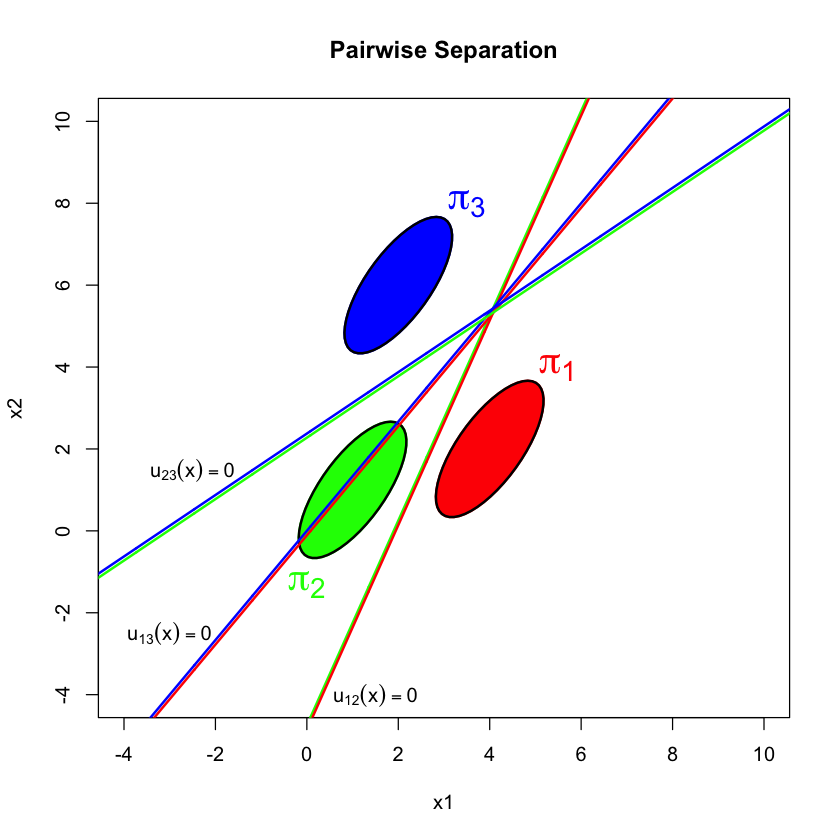

In [ ]:
# Slide 25:
f1<-function(x1){5*x1/2-19/4}
f2<-function(x1){4*x1/3}
f3<-function(x1){3*x1/4+19/8}
index<-(-500):1200/100

plot((-4):10,(-4):10,pch='',xlab='x1',ylab='x2',main="Pairwise Separation")

ellipse(c(4,2),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="red",
        fill.alpha=1)
ellipse(c(1,1),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="green",
        fill.alpha=1)
ellipse(c(2,6),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="blue",
        fill.alpha=1)
ellipse(c(4,2),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")
ellipse(c(1,1),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")
ellipse(c(2,6),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")

lines(index,f1(index),lwd=2,col="green")
lines(index,f1(index)-0.11,lwd=2,col="red")
lines(index,f2(index),lwd=2,col="blue")
lines(index,f2(index)-0.11,lwd=2,col="red")
lines(index,f3(index),lwd=2,col="blue")
lines(index,f3(index)-0.10,lwd=2,col="green")

text(5.5,4,expression(pi[1]),col="red",cex=2,font=2)
text(0,-1.3,expression(pi[2]),col="green",cex=2,font=2)
text(3.5,8,expression(pi[3]),col="blue",cex=2,font=2)

text(1.5,-4,expression(u[12](x)==0),font=2)
text(-3,-2.5,expression(u[13](x)==0),font=2)
text(-2.5,1.5,expression(u[23](x)==0),font=2)

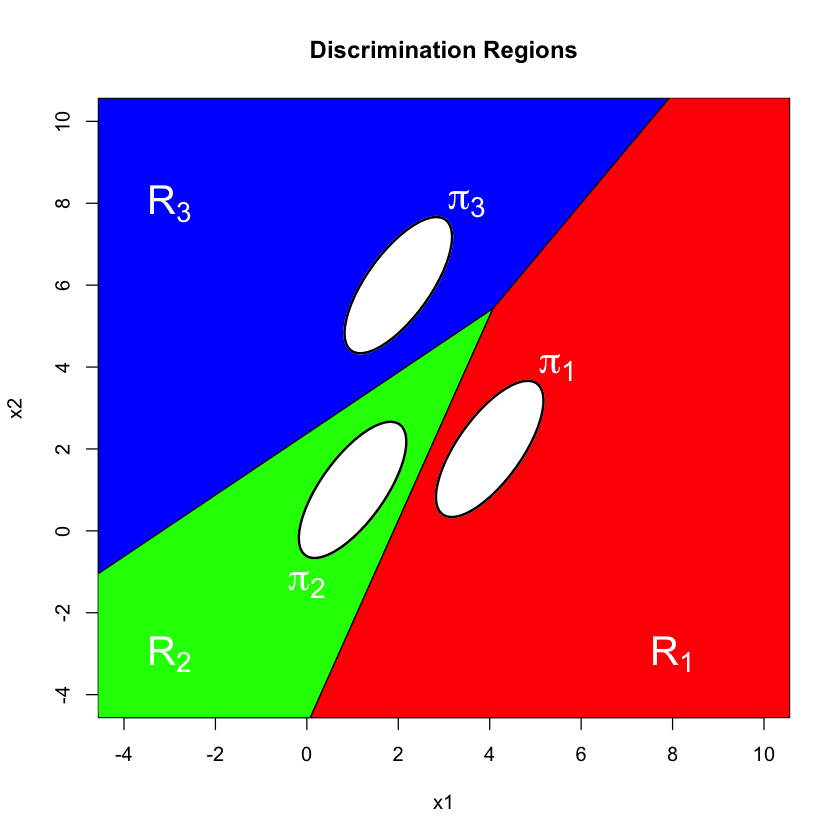

In [ ]:
# Slide 26:

plot((-4):10,(-4):10,pch='',xlab='x1',ylab='x2',main="Discrimination Regions")
rect(par("usr")[1],par("usr")[3],par("usr")[2],par("usr")[4],col = "blue")

polygon(c(index[1:908],index[908:1],par("usr")[1]),
        c(f3(index[1:908]),f1(index[908:1]),par("usr")[3]),
        col="green")

polygon(c(index,par("usr")[4],par("usr")[4],par("usr")[1]),
        c(f1(index[1:908]),f2(index[909:1701]),par("usr")[2],par("usr")[3],
        par("usr")[3]),
        col="red")
ellipse(c(4,2),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="white",
        fill.alpha=1)
ellipse(c(1,1),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="white",
        fill.alpha=1)
ellipse(c(2,6),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',fill=T,col="white",
        fill.alpha=1)
ellipse(c(4,2),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")
ellipse(c(1,1),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")
ellipse(c(2,6),matrix(c(1,1,1,2),nrow=2),sqrt(qchisq(0.5,df=2)),center.pch='',col="black")

text(5.5,4,expression(pi[1]),col="white",cex=2,font=2)
text(0,-1.3,expression(pi[2]),col="white",cex=2,font=2)
text(3.5,8,expression(pi[3]),col="white",cex=2,font=2)
text(8,-3,expression(R[1]),col="white",cex=2,font=2)
text(-3,-3,expression(R[2]),col="white",cex=2,font=2)
text(-3,8,expression(R[3]),col="white",cex=2,font=2)

In [ ]:
# Slide 46:

psychotic<-read.csv2("../data/psychotic.csv")
psychotic$group<-as.factor(psychotic$group)
summary(psychotic)

       group         size           shape      
 normal   :25   Min.   : 3.00   Min.   : 1.00  
 psychotic:25   1st Qu.:12.25   1st Qu.: 9.50  
                Median :19.50   Median :17.00  
                Mean   :16.80   Mean   :24.36  
                3rd Qu.:21.75   3rd Qu.:37.50  
                Max.   :25.00   Max.   :62.00  

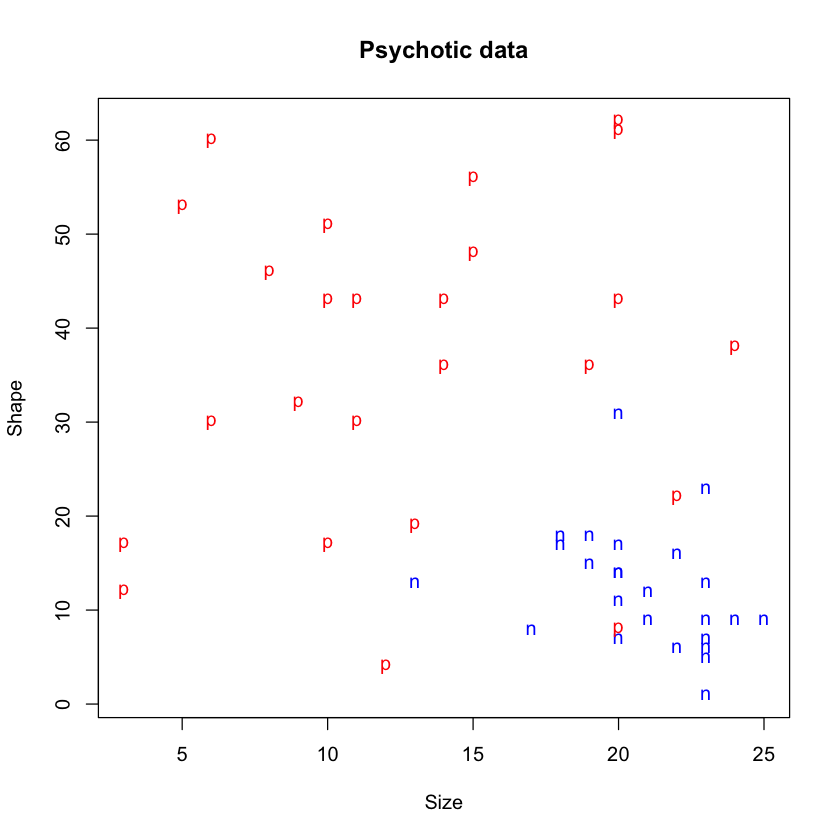

In [ ]:
# Slide 47
plot(psychotic$size,psychotic$shape,xlab='Size',ylab='Shape',
     pch=c("n","p")[as.numeric(psychotic$group)],
     col=c("blue","red")[as.numeric(psychotic$group)],
     main="Psychotic data")

In [ ]:
# Slide 47:
data.all<-as.matrix(psychotic[,2:3])
data.normal<-as.matrix(psychotic[psychotic$group=="normal",2:3])
data.psychotic<-as.matrix(psychotic[psychotic$group=="psychotic",2:3])

xbar.all<-matrix(rep(1,100),ncol=2)%*%diag(colMeans(data.all))
xbar.normal<-matrix(rep(1,50),ncol=2)%*%diag(colMeans(data.normal))
xbar.psychotic<-matrix(rep(1,50),ncol=2)%*%diag(colMeans(data.psychotic))

In [ ]:
# Slide 48:
W_normal<-t(data.normal-xbar.normal)%*%(data.normal-xbar.normal)
W_psychotic<-t(data.psychotic-xbar.psychotic)%*%(data.psychotic-xbar.psychotic)

W<-W_normal+W_psychotic
B<-25*(colMeans(data.normal)-colMeans(data.all))%*%
       t(colMeans(data.normal)-colMeans(data.all))+
   25*(colMeans(data.psychotic)-colMeans(data.all))%*%
       t(colMeans(data.psychotic)-colMeans(data.all))

T<-W+B

W; B; T

,size,shape
size,1048.0,207.60
shape,207.6,7891.44


size,shape
800,-2408.00
-2408,7248.08


,size,shape
size,1848.0,-2200.40
shape,-2200.4,15139.52


[1]  0.021749493 -0.008586287

[1] -0.022048959 -0.007325235

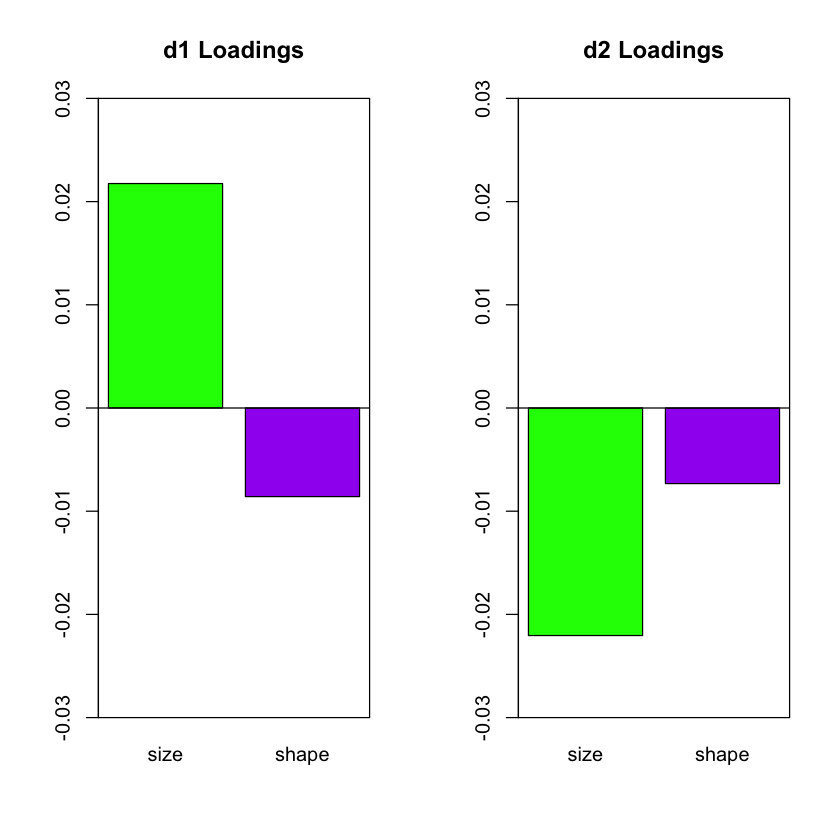

In [ ]:
# Slide 49:

d1<-eigen(solve(W)%*%B)$vectors[,1]
d1<-(1/as.numeric(sqrt(t(d1)%*%W%*%d1)))*d1

d2<-eigen(solve(W)%*%B)$vectors[,2]
d2<-(1/as.numeric(sqrt(t(d2)%*%W%*%d2)))*d2

d1
d2

# loadings plot
par(mfrow=c(1,2))
barplot(d1,names.arg=names(psychotic)[2:3],col=c("green","purple"),main="d1 Loadings",
        ylim=c(-0.03,0.03))
lines(0:3,rep(0,4),type="l")
box()
barplot(d2,names.arg=names(psychotic)[2:3],col=c("green","purple"),main="d2 Loadings",
        ylim=c(-0.03,0.03))
lines(0:3,rep(0,4),type="l")
box()
par(mfrow=c(1,1))

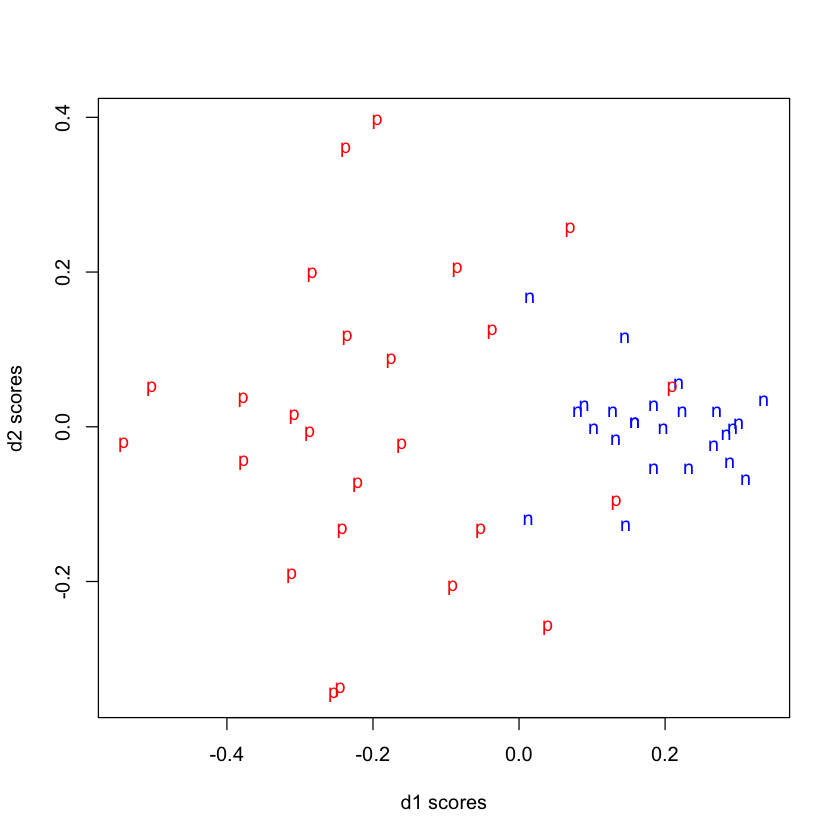

Call:
lda(group ~ size + shape, data = psychotic, prior = c(1/2, 1/2))

Prior probabilities of groups:
   normal psychotic 
      0.5       0.5 

Group means:
          size shape
normal    20.8 12.32
psychotic 12.8 36.40

Coefficients of linear discriminants:
              LD1
size  -0.15068491
shape  0.05948754

,LD1
size,-0.1443376
shape,-0.1443376


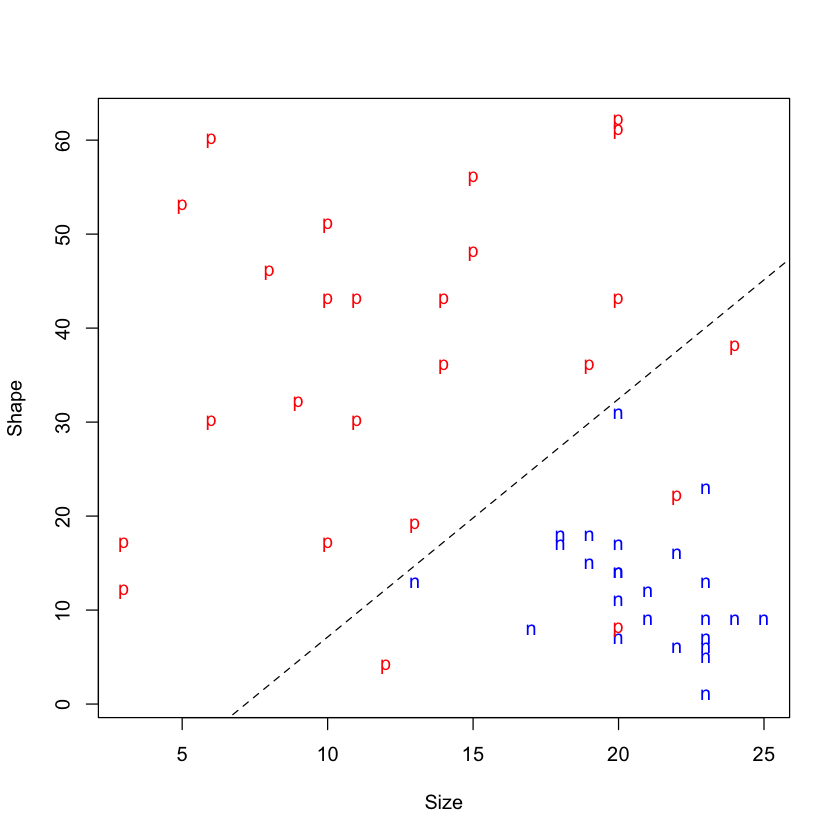

In [ ]:
#Slide 50:

# score plot
plot((data.all-xbar.all)%*%d1,(data.all-xbar.all)%*%d2,xlab='d1 scores',ylab='d2 scores',
     pch=c("n","p")[as.numeric(psychotic$group)],
     col=c("blue","red")[as.numeric(psychotic$group)])

# Slide 51:
plot(data.all[,1],data.all[,2],xlab='Size',ylab='Shape',
     pch=c("n","p")[as.numeric(psychotic$group)],
     col=c("blue","red")[as.numeric(psychotic$group)])
lines(0:30,-(d1[1]/d1[2])*((0:30)-16.8)+24.36,type="l",lty=2)

library(MASS)

(my.lda<-lda(group ~ size + shape, prior=c(1/2,1/2), data=psychotic) )

d1/my.lda$scaling
# constant; ie. same directions; same discrimination.

           Classification
Nature      normal psychotic
  normal        25         0
  psychotic      4        21

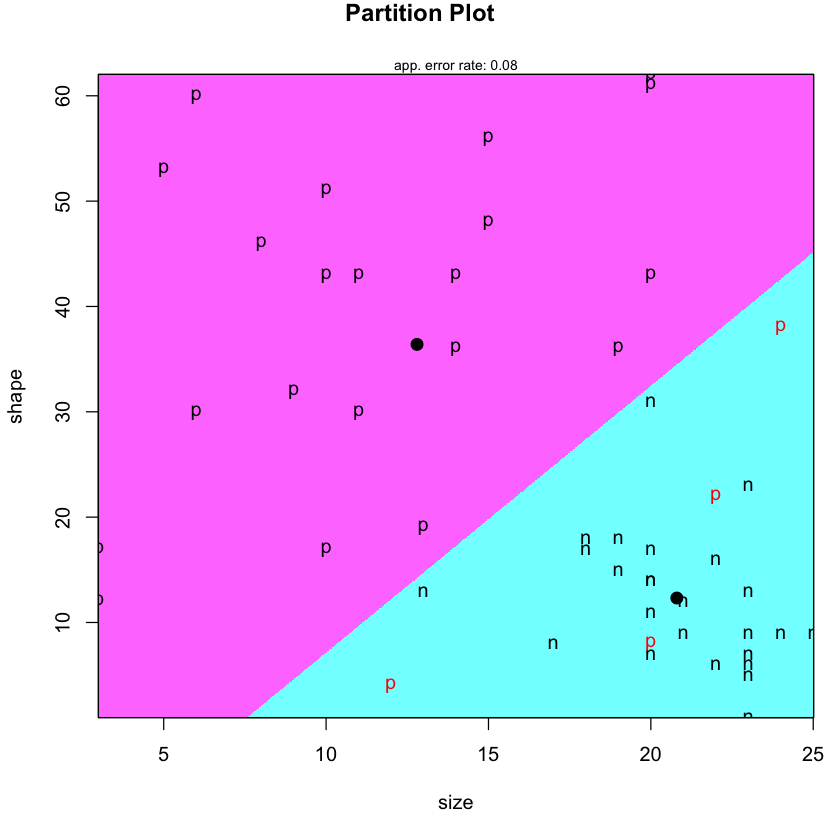

In [ ]:
# Slide 54:
library(klaR)
partimat(group ~ shape + size, prior=c(1/2,1/2), data=psychotic, method="lda",prec=1000)

# Slide 55:

table(psychotic$group,predict(my.lda)[[1]],dnn=c("Nature","Classification"))

In [ ]:
# Slide 56:

# test for additional information
# does shape contribute significantly?

Lambda.21<-(T[1,1]/det(T))*(det(W)/W[1,1])

my.F<-47*(1-Lambda.21)/Lambda.21

1-pf(47*(1-Lambda.21)/Lambda.21,1,47)

[1] 3.165566e-06

,size,shape
size,6.916667,-5.266667
shape,-5.266667,40.893333


,size,shape
size,36.75000,13.91667
shape,13.91667,287.91667


Call:
qda(group ~ size + shape, data = psychotic, prior = c(1/2, 1/2))

Prior probabilities of groups:
   normal psychotic 
      0.5       0.5 

Group means:
          size shape
normal    20.8 12.32
psychotic 12.8 36.40

           Classification
Nature      normal psychotic
  normal        23         2
  psychotic      2        23

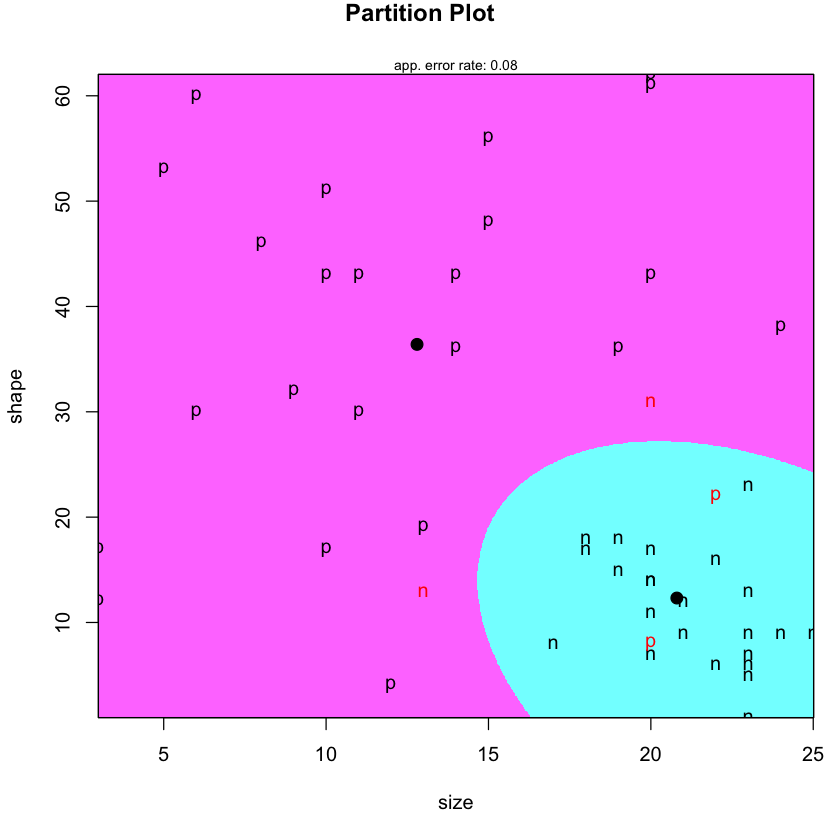

In [ ]:
# Slide 57:
W_normal/24;W_psychotic/24

# Slide 58:

(my.qda<-qda(group ~ size + shape, prior=c(1/2,1/2), data=psychotic) )

#Slide 59:

partimat(group ~ shape + size, prior=c(1/2,1/2), data=psychotic, method="qda",prec=1000)

table(psychotic$group,predict(my.qda)[[1]],dnn=c("Nature","Classification"))

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

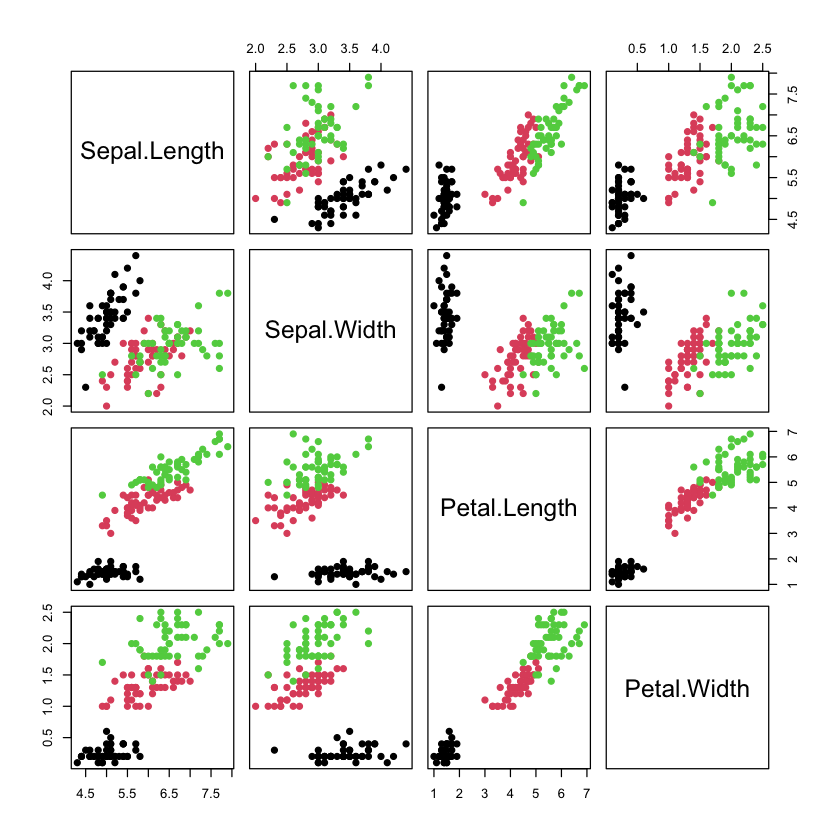

In [ ]:
# Slide 61:

iris<-datasets::iris
names(iris)
pairs(iris[,1:4], col=iris$Species, pch=19)

In [ ]:
# Slide 62:

iris.all<-as.matrix(iris[,1:4])
iris.setosa<-as.matrix(iris[iris$Species=="setosa",1:4])
iris.versicolor<-as.matrix(iris[iris$Species=="versicolor",1:4])
iris.virginica<-as.matrix(iris[iris$Species=="virginica",1:4])

xbar.all<-matrix(rep(1,4*150),ncol=4)%*%diag(colMeans(iris.all))
xbar.setosa<-matrix(rep(1,4*50),ncol=4)%*%diag(colMeans(iris.setosa))
xbar.versicolor<-matrix(rep(1,4*50),ncol=4)%*%diag(colMeans(iris.versicolor))
xbar.virginica<-matrix(rep(1,4*50),ncol=4)%*%diag(colMeans(iris.virginica))

# Slide 63:
W_setosa<-t(iris.setosa-xbar.setosa)%*%(iris.setosa-xbar.setosa)
W_versicolor<-t(iris.versicolor-xbar.versicolor)%*%(iris.versicolor-xbar.versicolor)
W_virginica<-t(iris.virginica-xbar.virginica)%*%(iris.virginica-xbar.virginica)

W_setosa/49

W_versicolor/49

W_virginica/49

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.12424898,0.099216327,0.016355102,0.010330612
Sepal.Width,0.09921633,0.143689796,0.011697959,0.009297959
Petal.Length,0.01635510,0.011697959,0.030159184,0.006069388
Petal.Width,0.01033061,0.009297959,0.006069388,0.011106122


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.26643265,0.08518367,0.18289796,0.05577959
Sepal.Width,0.08518367,0.09846939,0.08265306,0.04120408
Petal.Length,0.18289796,0.08265306,0.22081633,0.07310204
Petal.Width,0.05577959,0.04120408,0.07310204,0.03910612


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.40434286,0.09376327,0.30328980,0.04909388
Sepal.Width,0.09376327,0.10400408,0.07137959,0.04762857
Petal.Length,0.30328980,0.07137959,0.30458776,0.04882449
Petal.Width,0.04909388,0.04762857,0.04882449,0.07543265


In [ ]:
# Slide 65:

mu.setosa<-colMeans(iris.setosa)
Sigma.setosa<-W_setosa/49

# Displaying:
mu.setosa
Sigma.setosa
log(det(Sigma.setosa))
solve(Sigma.setosa)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.006        3.428        1.462        0.246

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.12424898,0.099216327,0.016355102,0.010330612
Sepal.Width,0.09921633,0.143689796,0.011697959,0.009297959
Petal.Length,0.01635510,0.011697959,0.030159184,0.006069388
Petal.Width,0.01033061,0.009297959,0.006069388,0.011106122


[1] -13.06736

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,18.943439,-12.404826,-4.500207,-4.776127
Sepal.Width,-12.404826,15.570540,1.111079,-2.104098
Petal.Length,-4.500207,1.111079,38.776204,-17.935035
Petal.Width,-4.776127,-2.104098,-17.935035,106.045906


In [ ]:
# Slide 66:
S.setosa.Q<-function(x){-(log(det(Sigma.setosa))/2+
                          t(x)%*%solve(Sigma.setosa)%*%x-                           
                          t(mu.setosa)%*%solve(Sigma.setosa)%*%mu.setosa/2)}

In [ ]:
# Slide 67:
my.qda <-qda(Species ~ Sepal.Length+Sepal.Width + Petal.Length+
              Petal.Width, prior=c(1,1,1)/3, data=iris)

head(predict(my.qda)[[2]])
head(predict(my.qda)[[1]])

,setosa,versicolor,virginica
1,1,4.918517e-26,2.981541e-41
2,1,7.655808e-19,1.311032e-34
3,1,1.552279e-21,3.380440e-36
4,1,8.300396e-19,8.541858e-32
5,1,3.365614e-27,2.010147e-41
6,1,1.472533e-26,1.271928e-40


[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

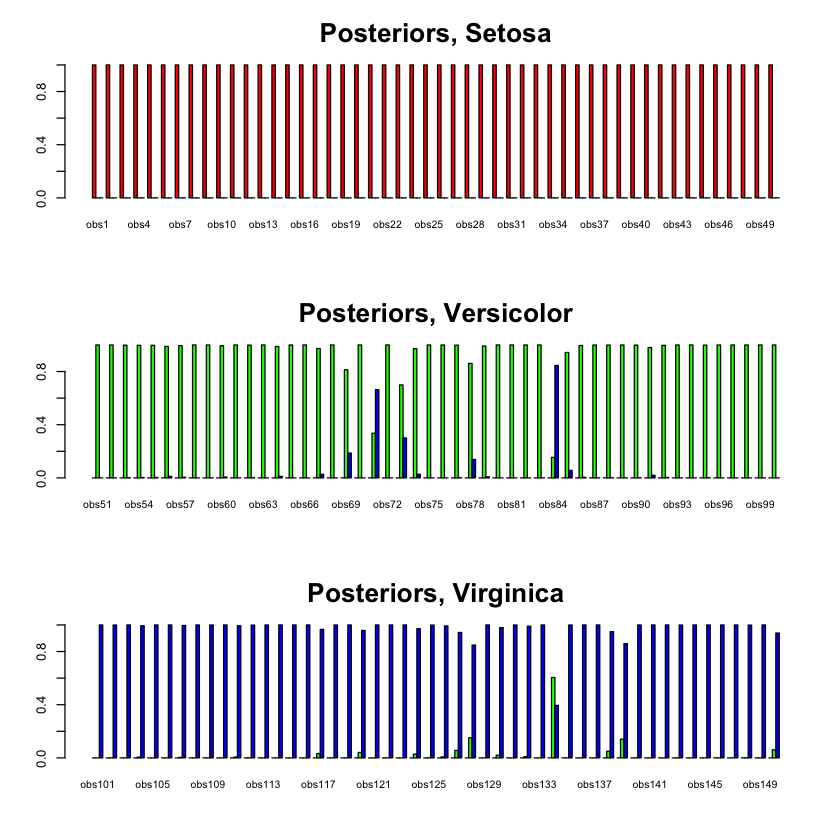

In [ ]:
# Slide 68:
par(mfrow=c(3,1))
barplot(t(as.matrix(predict(my.qda)[[2]][1:50,])),
        names.arg=paste("obs",1:50,sep=""),
        col=c("red","green","blue"),
        main="Posteriors, Setosa",beside=TRUE,
        cex.names=0.8,cex.main=2)
barplot(t(as.matrix(predict(my.qda)[[2]][51:100,])),
        names.arg=paste("obs",51:100,sep=""),
        col=c("red","green","blue"),
        main="Posteriors, Versicolor",beside=TRUE,
        cex.names=0.8,cex.main=2)
barplot(t(as.matrix(predict(my.qda)[[2]][101:150,])),
        names.arg=paste("obs",101:150,sep=""),
        col=c("red","green","blue"),
        main="Posteriors, Virginica",beside=TRUE,
        cex.names=0.8,cex.main=2)
par(mfrow=c(1,1))

In [ ]:
# Slide 69:
table(iris$Species,predict(my.qda)[[1]],dnn=c("Nature","Classification"))

            Classification
Nature       setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          1        49

In [ ]:
# Slide 82:

synprod <- data.frame("Acontent"=c(1,0,0.5), 					  
                      "Bcontent"=c(0,1,0.5), 
		         "Qual"=c(90,30,75)) 

glmSyn <- lm(Qual ~ Acontent + Bcontent - 1, data=synprod) 
# the "-1" in the line above removes the intercept 
# If not specified an intercept is estimated by default

In [ ]:
# Slide 83

summary(glmSyn)


Call:
lm(formula = Qual ~ Acontent + Bcontent - 1, data = synprod)

Residuals:
 1  2  3 
-5 -5 10 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)  
Acontent    95.00      11.18   8.497   0.0746 .
Bcontent    35.00      11.18   3.130   0.1968  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.25 on 1 degrees of freedom
Multiple R-squared:  0.9897,	Adjusted R-squared:  0.9692 
F-statistic: 48.25 on 2 and 1 DF,  p-value: 0.1013
